Nama : Andrew

NIM : 2540119601

Kelas : LA09

Mata Kuliah : Deep Learning

Jurusan : Data Science

Link Video : https://www.youtube.com/watch?v=c6NuhT20-so

###### Import Dataset

In [96]:
# libary
import pandas as pd

Data diambil melalui drive

In [97]:
# connect to drive to easily get data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Parse colomn date sehingga sesuai dengan format date dan juga membuat kolom date menjadi index, karena time series data

In [98]:
# specify to make date as a index
df1 = pd.read_csv('/content/drive/MyDrive/UAS_deepLearning_data/Dataset C/GOOGL.csv',parse_dates=["Date"],index_col=["Date"])
df2 = pd.read_csv('/content/drive/MyDrive/UAS_deepLearning_data/Dataset C/INTC.csv',parse_dates=["Date"],index_col=["Date"])

In [99]:
print(df1)
print(df2)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2004-08-19    50.050049    52.082081    48.028027    50.220219    50.220219   
2004-08-20    50.555557    54.594593    50.300301    54.209209    54.209209   
2004-08-23    55.430431    56.796795    54.579578    54.754753    54.754753   
2004-08-24    55.675674    55.855854    51.836838    52.487488    52.487488   
2004-08-25    52.532532    54.054054    51.991993    53.053055    53.053055   
...                 ...          ...          ...          ...          ...   
2020-03-26  1114.719971  1171.479980  1092.030029  1162.920044  1162.920044   
2020-03-27  1127.469971  1151.050049  1104.000000  1110.260010  1110.260010   
2020-03-30  1132.640015  1151.000000  1098.489990  1146.310059  1146.310059   
2020-03-31  1148.729980  1173.400024  1136.719971  1161.949951  1161.949951   
2020-04-01  1124.000000  1129.420044  1093.489990  1

Pada soal yang dipakai hanya kolom close untuk kedua data, sehingga dapat membuat dataframe baru yang berisikan colomn close.

In [100]:
# takes only index and close on each day
google = pd.DataFrame(df1["Close"])
intc = pd.DataFrame(df2["Close"])
print(google.head())
print(intc.head())

                Close
Date                 
2004-08-19  50.220219
2004-08-20  54.209209
2004-08-23  54.754753
2004-08-24  52.487488
2004-08-25  53.053055
               Close
Date                
1980-03-17  0.325521
1980-03-18  0.322917
1980-03-19  0.330729
1980-03-20  0.329427
1980-03-21  0.317708


Database telah terbentuk dengan berisikan kolom close dan index date

> With this we can proceeed to the next step, which is LSTM preprocessing

###### [LO 3, LO 4, 10 poin] Lakukan eksplorasi data terlebih dahulu untuk memahami permasalahan yang dihadapi terlebih dahulu. Dataset yang diberikan adalah data time series, lakukan praproses data untuk menyelesaikan problem dari data tersebut. Pisahkan data time seriestersebut menjadi dua bagian input dan output dengan window size = 5 [dari hari senin s.d jumat] dan horizon = 1 [hari senin saja]. Selanjutnya pisahkan dataset menjadi train, test dan validation set dengan ketentuan (80 train, 10 val, 10 test)


In [101]:
# Library
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler

In [102]:
print(google.head(20))
print()
print(intc.head(20))

                Close
Date                 
2004-08-19  50.220219
2004-08-20  54.209209
2004-08-23  54.754753
2004-08-24  52.487488
2004-08-25  53.053055
2004-08-26  54.009010
2004-08-27  53.128128
2004-08-30  51.056057
2004-08-31  51.236237
2004-09-01  50.175175
2004-09-02  50.805805
2004-09-03  50.055054
2004-09-07  50.840839
2004-09-08  51.201202
2004-09-09  51.206207
2004-09-10  52.717716
2004-09-13  53.803802
2004-09-14  55.800800
2004-09-15  56.056057
2004-09-16  57.042042

               Close
Date                
1980-03-17  0.325521
1980-03-18  0.322917
1980-03-19  0.330729
1980-03-20  0.329427
1980-03-21  0.317708
1980-03-24  0.311198
1980-03-25  0.312500
1980-03-26  0.309896
1980-03-27  0.299479
1980-03-28  0.311198
1980-03-31  0.321615
1980-04-01  0.322917
1980-04-02  0.325521
1980-04-03  0.319010
1980-04-07  0.311198
1980-04-08  0.312500
1980-04-09  0.305990
1980-04-10  0.304688
1980-04-11  0.304688
1980-04-14  0.307292


Disini dapat dilihat terdapat beberapa hari libur dimana pada hari tersebut bursa saham tutup, selain itu juga setiap hari sabtu dan minggu bursa sama tutup.

In [103]:
# Exploration data on each dataset
# Checking null value
google.info()
print()
intc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3932 entries, 2004-08-19 to 2020-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3932 non-null   float64
dtypes: float64(1)
memory usage: 61.4 KB

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10098 entries, 1980-03-17 to 2020-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   10098 non-null  float64
dtypes: float64(1)
memory usage: 157.8 KB


Dari sini diketahui tidak ada null value yang dihasilkan dan terdapat 3932 data pada saham google dan 10098 data pada saham intc

disini data duplicated tidak cek, karena ada kemungkinan saham memiliki value yang sama pada saat close di hari yang berbeda dan juga untuk outlier tidak cek, karena ada kemungkinan di dalam data saham memiliki data yang melonjak tinggi pada hari-hari tertentu atau suatu event.

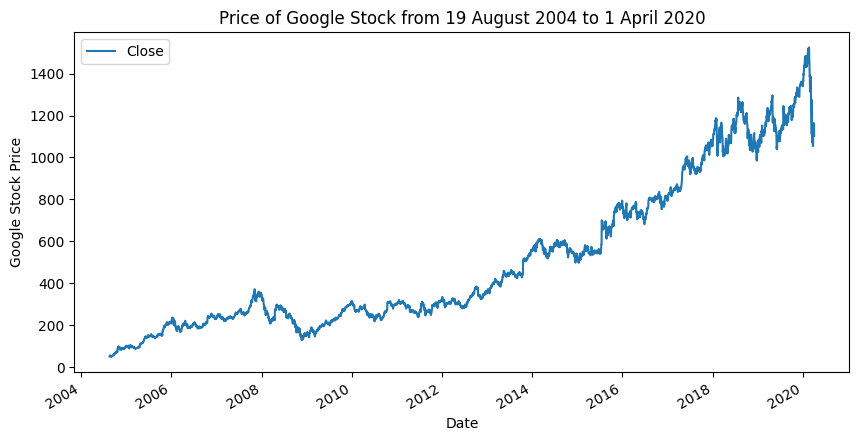

In [104]:
# see the data in plot
google.plot(figsize=(10, 5))
plt.ylabel("Google Stock Price")
plt.title("Price of Google Stock from 19 August 2004 to 1 April 2020", fontsize=12)
plt.legend(fontsize=10);

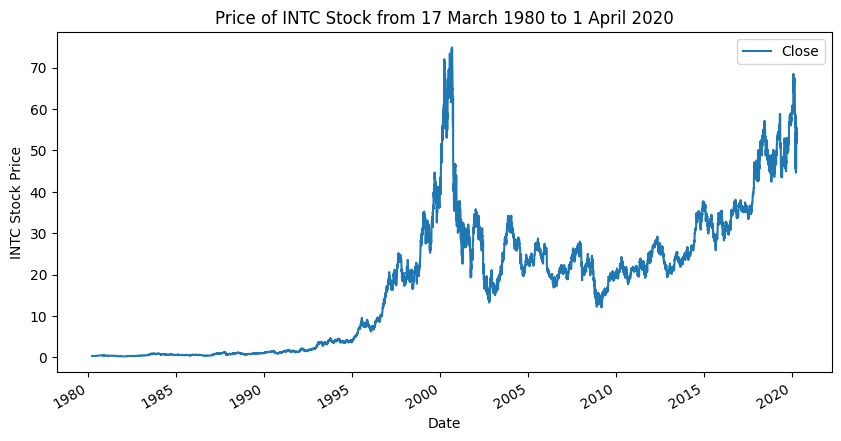

In [105]:
# see the data in plot
intc.plot(figsize=(10, 5))
plt.ylabel("INTC Stock Price")
plt.title("Price of INTC Stock from 17 March 1980 to 1 April 2020", fontsize=12)
plt.legend(fontsize=10);

Dari kedau plot yang telah terbentuk kita mengetahui intel memiliki kenaikan harga close lebih kecil dibandingkan dengan google.

Selain itu intc memiliki data dari tahun 1980, sedangkan google memiliki data tahun 2004.

Untuk trend dari data sendiri dapat dilihat google meningkat setiap tahun, tetapi untuk saham intel megalami kenaikan tinggi disekitar tahun 200.

Before windowing changing make new variable of array to hold a value of the clossing price

In [106]:
# to hold value of price
close_goo = google["Close"].to_numpy()
close_intc = intc["Close"].to_numpy()

print(close_goo)
print(close_intc)

[  50.22021866   54.20920944   54.75475311 ... 1146.31005859 1161.94995117
 1102.09997559]
[ 0.32552084  0.32291666  0.33072916 ... 55.49000168 54.11999893
 51.88000107]


Membuat function untuk pembuatan window dan horizon yang sekaligus melakukan splitting.

Window yang diminta adalah 5 dari senin hingga jumat dan horizon adalah 1 hari senin saja.

Define scaler untuk melakukan scalling, karena pada modeling akan dikalukan scaling.

In [107]:
scaler = MinMaxScaler(feature_range=(0,1))

In [108]:
def window_data(df_close,scaling=False,train_size=0.8, check_value=False):

    training_data_len = math.ceil(len(df_close)* train_size)

    if scaling is True :
      data = scaler.fit_transform(df_close.values.reshape(-1, 1))
    else:
      data = df_close.values

    train_df = df_close.iloc[: training_data_len]
    train_data = data[:training_data_len]


    #Train set data
    # Define variable for train
    train_window = []
    train_horizon = []

    # using for loop with validate only accept closing when there is start from monday to friday(window)
    # Also have next following data of monday(horizon)
    for i in range(len(train_df)):
      if train_df.index[i].weekday() == 0 and i+5 < len(train_df) and train_df.index[i + 5].weekday() == 0:
        train_window.append(train_data[i:i+5])
        train_horizon.append(train_data[i+5])

    #Determine where the start value of validation and test
    val_test_df = df_close.iloc[training_data_len: ]
    val_test_data = data[training_data_len: ]
    val_test_len = len(val_test_data)
    val_len = int(val_test_len * 0.5)
    test_len = val_test_len - val_len

    # Validation set data
    # Define variable for validation
    val_window = []
    val_horizon = []
    val_df =val_test_df.iloc[:val_len]
    val_data = val_test_data[:val_len]
    # using for loop with validate only accept closing when there is start from monday to friday(window)
    # Also have next following data of monday(horizon)
    for i in range(len(val_data)):
      if val_df.index[i].weekday() == 0 and i+5 < len(val_df) and val_df.index[i + 5].weekday() == 0:
        val_window.append(val_data[i:i+5])
        val_horizon.append(val_data[i+5])

    # Test set
    # Define variable for validation
    test_window = []
    test_horizon = []
    test_df = val_test_df.iloc[test_len:]
    test_data = val_test_data[test_len:]
    # using for loop with validate only accept closing when there is start from monday to friday(window)
    # Also have next following data of monday(horizon)
    for i in range(len(test_df)):
      if test_df.index[i].weekday() == 0 and i+5 < len(test_df) and test_df.index[i + 5].weekday() == 0:
        test_window.append(test_data[i:i+5])
        test_horizon.append(test_data[i+5])

    # change the window data to array
    train_window = np.array(train_window)
    train_horizon = np.array(train_horizon)
    val_window = np.array(val_window)
    val_horizon = np.array(val_horizon)
    test_window = np.array(test_window)
    test_horizon = np.array(test_horizon)

    # Reshape the data so it can use in training data
    train_window = np.reshape(train_window, (train_window.shape[0], train_window.shape[1], 1))
    val_window = np.reshape(val_window, (val_window.shape[0], val_window.shape[1], 1))
    test_window = np.reshape(test_window, (test_window.shape[0], test_window.shape[1], 1))
    if check_value is True :
      print("Sample Window :")
      for i in range(5):
        print("train window :",train_window[i].flatten(),"-> Horizon :",train_horizon[i].flatten())
    else:
      return train_window, train_horizon, val_window, val_horizon, test_window, test_horizon

Contoh dari window dan horizon yang akan terbentuk pada train set

In [109]:
print("google")
window_data(google,check_value=True)
print()
print("intel")
window_data(intc,check_value=True)

google
Sample Window :
train window : [54.75475311 52.48748779 53.05305481 54.00901031 53.12812805] -> Horizon : [51.05605698]
train window : [53.80380249 55.80080032 56.05605698 57.04204178 58.80380249] -> Horizon : [59.73973846]
train window : [59.73973846 58.9789772  59.2492485  60.47047043 59.97497559] -> Horizon : [59.18918991]
train window : [59.18918991 63.49349213 65.60560608 64.86486816 66.35635376] -> Horizon : [67.59759521]
train window : [67.59759521 69.2542572  68.60861206 69.49449158 68.93393707] -> Horizon : [67.6977005]

intel
Sample Window :
train window : [0.32552084 0.32291666 0.33072916 0.32942709 0.31770834] -> Horizon : [0.31119791]
train window : [0.31119791 0.3125     0.30989584 0.29947916 0.31119791] -> Horizon : [0.32161459]
train window : [0.31119791 0.3125     0.30598959 0.3046875  0.3046875 ] -> Horizon : [0.30729166]
train window : [0.30729166 0.30338541 0.29166666 0.28645834 0.29036459] -> Horizon : [0.28776041]
train window : [0.28776041 0.30078125 0.319

In [110]:
train_win_goo, train_lab_goo, val_win_goo, val_lab_goo, test_win_goo, test_lab_goo = window_data(google, scaling = True)
len(train_win_goo), len(train_lab_goo), len(val_win_goo), len(val_lab_goo), len(test_win_goo), len(test_lab_goo)

(480, 480, 60, 60, 60, 60)

In [111]:
train_win_int, train_lab_int, val_win_int, val_lab_int, test_win_int, test_lab_int = window_data(intc, scaling = True)
len(train_win_int), len(train_lab_int), len(val_win_int), len(val_lab_int), len(test_win_int), len(test_lab_int)

(1269, 1269, 154, 154, 153, 153)

In [112]:
test_win_int_check = scaler.inverse_transform(test_win_int[:,0,0].reshape(-1, 1))
test_win_goo_check = scaler.inverse_transform(test_win_goo[:,0,0].reshape(-1, 1))

Degan begitu kedua dataset telah siap untuk dimodelkan

###### [LO 3, LO 4, 5 poin] Buatlah arsitektur baseline dengan LSTM (units=50) dan layer akhir berupa node Perceptron dengan units=1. Activation function untuk LSTM menggunakan ReLU

Sebelum modeling membuat beberapa function untuk mengevaluasi model

In [113]:
# library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [114]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [115]:
# function for evaluate model
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)

  return mae.numpy(),rmse.numpy(),mape.numpy()

Membuat dataframe yang akan menampung result dari model

In [116]:
google_model = pd.DataFrame(columns=['Model', 'MAE', 'RMSE', 'MAPE'])

In [117]:
intel_model = pd.DataFrame(columns=['Model', 'MAE', 'RMSE', 'MAPE'])

Basemodel google

In [118]:
basemodel_goo =  keras.Sequential()

In [119]:
# imput layer next with lstm
basemodel_goo.add(layers.LSTM(units=50, input_shape=(5, 1), activation="relu"))
# output layer
basemodel_goo.add(layers.Dense(1))

In [120]:
basemodel_goo.compile(loss="mae")

In [121]:
basemodel_goo.fit(train_win_goo,
            train_lab_goo,
            epochs=40,
            verbose=1,
            batch_size = 32,
            validation_data=(val_win_goo, val_lab_goo))

Epoch 1/40
15/15 [==============================] - 3s 23ms/step - loss: 0.1601 - val_loss: 0.5111
Epoch 2/40
15/15 [==============================] - 0s 6ms/step - loss: 0.0862 - val_loss: 0.3806
Epoch 3/40
15/15 [==============================] - 0s 8ms/step - loss: 0.0592 - val_loss: 0.2820
Epoch 4/40
15/15 [==============================] - 0s 6ms/step - loss: 0.0387 - val_loss: 0.1713
Epoch 5/40
15/15 [==============================] - 0s 9ms/step - loss: 0.0176 - val_loss: 0.0544
Epoch 6/40
15/15 [==============================] - 0s 7ms/step - loss: 0.0108 - val_loss: 0.0563
Epoch 7/40
15/15 [==============================] - 0s 7ms/step - loss: 0.0098 - val_loss: 0.0347
Epoch 8/40
15/15 [==============================] - 0s 7ms/step - loss: 0.0097 - val_loss: 0.0565
Epoch 9/40
15/15 [==============================] - 0s 6ms/step - loss: 0.0094 - val_loss: 0.0444
Epoch 10/40
15/15 [==============================] - 0s 8ms/step - loss: 0.0091 - val_loss: 0.0592
Epoch 11/40
15/15 

In [122]:
basemodel_goo.evaluate(test_win_goo, test_lab_goo)

2/2 [==============================] - 0s 7ms/step - loss: 0.0584


0.05842805653810501

In [123]:
basemodel_goo_preds = basemodel_goo.predict(test_win_goo)
basemodel_goo_preds_check = scaler.inverse_transform(basemodel_goo_preds)

2/2 [==============================] - 0s 17ms/step


In [124]:
basemodel_goo_results = evaluate_preds(y_true=tf.squeeze(test_lab_goo), y_pred=basemodel_goo_preds.flatten())
google_model.loc[0] = ["Base",basemodel_goo_results[0],basemodel_goo_results[1],basemodel_goo_results[2]]
print("MAE :",basemodel_goo_results[0])
print("RMSE :",basemodel_goo_results[1])
print("MAPE :",basemodel_goo_results[2])

MAE : 0.058428064
RMSE : 0.06350657
MAPE : 7.3717737


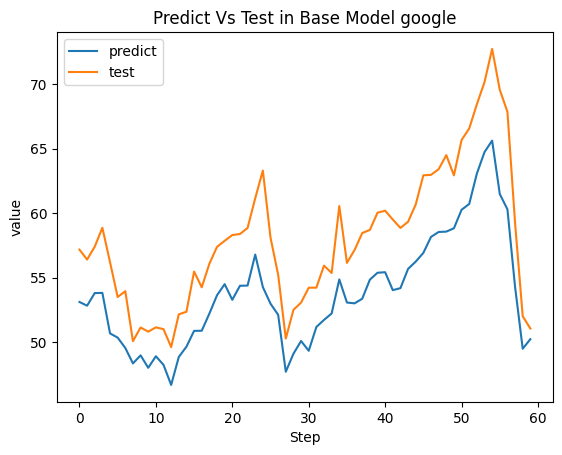

In [125]:
plt.plot(basemodel_goo_preds_check, label='predict')
plt.plot(test_win_goo_check,label='test')
plt.title("Predict Vs Test in Base Model google")
plt.xlabel("Step")
plt.ylabel("value")
plt.legend()
plt.show()

In [126]:
basemodel_int = keras.Sequential()

In [127]:
# imput layer next with lstm
basemodel_int.add(layers.LSTM(units=50, input_shape=(5,1), activation="relu"))
# output layer
basemodel_int.add(layers.Dense(1))

In [128]:
basemodel_int.compile(loss="mae")

In [129]:
history = basemodel_int.fit(train_win_int,
            train_lab_int,
            epochs=40,
            verbose=1,
            validation_data=(val_win_int, val_lab_int))

Epoch 1/40
40/40 [==============================] - 2s 11ms/step - loss: 0.1021 - val_loss: 0.0985
Epoch 2/40
40/40 [==============================] - 0s 5ms/step - loss: 0.0164 - val_loss: 0.0075
Epoch 3/40
40/40 [==============================] - 0s 5ms/step - loss: 0.0097 - val_loss: 0.0068
Epoch 4/40
40/40 [==============================] - 0s 5ms/step - loss: 0.0095 - val_loss: 0.0058
Epoch 5/40
40/40 [==============================] - 0s 5ms/step - loss: 0.0089 - val_loss: 0.0068
Epoch 6/40
40/40 [==============================] - 0s 5ms/step - loss: 0.0091 - val_loss: 0.0071
Epoch 7/40
40/40 [==============================] - 0s 5ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/40
40/40 [==============================] - 0s 5ms/step - loss: 0.0089 - val_loss: 0.0085
Epoch 9/40
40/40 [==============================] - 0s 9ms/step - loss: 0.0088 - val_loss: 0.0098
Epoch 10/40
40/40 [==============================] - 0s 8ms/step - loss: 0.0089 - val_loss: 0.0075
Epoch 11/40
40/40 

In [130]:
basemodel_int.evaluate(test_win_int, test_lab_int)

5/5 [==============================] - 0s 4ms/step - loss: 0.0125


0.012461621314287186

In [131]:
basemodel_int_preds = basemodel_goo.predict(test_win_int)
basemodel_int_preds_check = scaler.inverse_transform(basemodel_int_preds)

5/5 [==============================] - 0s 3ms/step


In [132]:
basemodel_int_results = evaluate_preds(y_true=tf.squeeze(test_lab_int), y_pred=basemodel_int_preds.flatten())
intel_model.loc[0] = ["Base",basemodel_int_results[0],basemodel_int_results[1],basemodel_int_results[2]]
print("MAE :",basemodel_int_results[0])
print("RMSE :",basemodel_int_results[1])
print("MAPE :",basemodel_int_results[2])

MAE : 0.029387984
RMSE : 0.037500776
MAPE : 4.477377


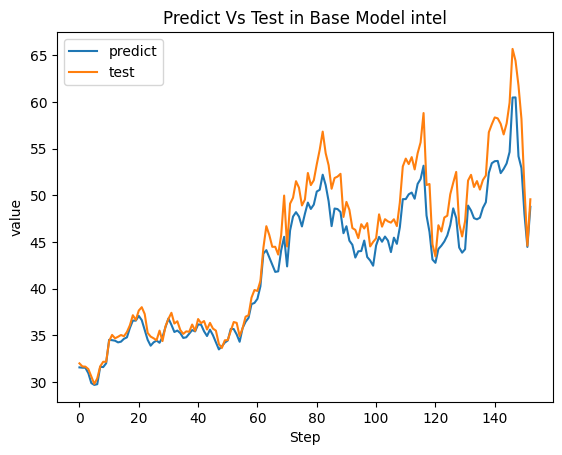

In [133]:
plt.plot(basemodel_int_preds_check, label='predict')
plt.plot(test_win_int_check,label='test')
plt.title("Predict Vs Test in Base Model intel")
plt.xlabel("Step")
plt.ylabel("value")
plt.legend()
plt.show()

###### [LO 1, LO 2, LO 3, LO 4, 15 poin] Setelah mengetahui hasil dari nomor (1c), modifikasi arsitektur pada nomor 1c untuk mendapatkan unjuk kerja yang optimal (kalian dapat menambahkan atau mengurangi arsitektur tersebut, atau mengganti hyperparameter, atau menggunakan tuning pada hyperparameter). Jelaskan alasan kalian untuk menggunakan pendekatan yang kalian pilih

Lanjut ke modelling data LSTM dengan menggunakan arsitektur yang sama untuk google dengan menabhkan unit 75. Dan terdapat tambahan pada google dimana google akan diganti lossnya menjadi MSE , sendangkan untuk intel tetap dengan MAE.

In [134]:
model1_goo =  keras.Sequential()

In [135]:
# imput layer next with lstm
model1_goo.add(layers.LSTM(units=75, input_shape=(5, 1), activation="relu"))
# output layer
model1_goo.add(layers.Dense(1,activation="linear"))

In [136]:
model1_goo.compile(loss="mse",optimizer=tf.optimizers.Adam())

In [137]:
model1_goo.fit(train_win_goo,
            train_lab_goo,
            epochs=50,
            verbose=1,
            batch_size=32,
            validation_data=(val_win_goo, val_lab_goo))

Epoch 1/50
15/15 [==============================] - 1s 23ms/step - loss: 0.0323 - val_loss: 0.1576
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0075 - val_loss: 0.0313
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0171
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 9.9217e-04 - val_loss: 5.6652e-04
Epoch 5/50
15/15 [==============================] - 0s 8ms/step - loss: 1.3470e-04 - val_loss: 9.4508e-04
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 1.2114e-04 - val_loss: 2.9611e-04
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 7.7449e-05 - val_loss: 2.7126e-04
Epoch 8/50
15/15 [==============================] - 0s 7ms/step - loss: 6.4564e-05 - val_loss: 3.1775e-04
Epoch 9/50
15/15 [==============================] - 0s 6ms/step - loss: 6.3733e-05 - val_loss: 3.9596e-04
Epoch 10/50
15/15 [==============================] - 0s 8ms/step - lo

In [138]:
model1_goo.evaluate(test_win_goo, test_lab_goo)

2/2 [==============================] - 0s 9ms/step - loss: 5.8986e-04


0.0005898595554754138

In [139]:
model1_goo_preds = model1_goo.predict(test_win_goo)
model1_goo_preds_check = scaler.inverse_transform(model1_goo_preds)

2/2 [==============================] - 0s 9ms/step


In [140]:
model1_goo_results = evaluate_preds(y_true=tf.squeeze(test_lab_goo), y_pred=model1_goo_preds.flatten())
google_model.loc[1] = ["Unit 75 with MSE",model1_goo_results[0],model1_goo_results[1],model1_goo_results[2]]
print("MAE :",model1_goo_results[0])
print("RMSE :",model1_goo_results[1])
print("MAPE :",model1_goo_results[2])

MAE : 0.017915709
RMSE : 0.02428702
MAPE : 2.3419776


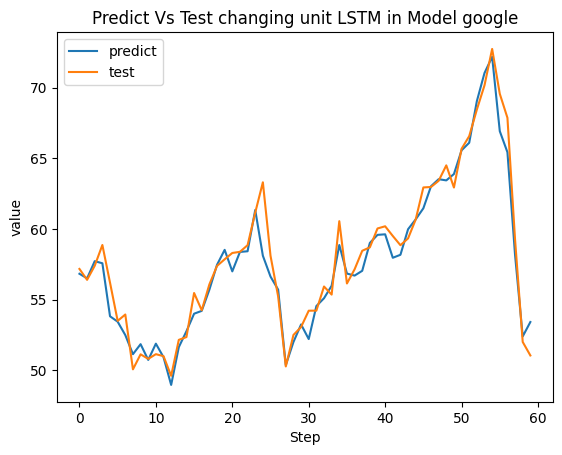

In [141]:
plt.plot(model1_goo_preds_check, label='predict')
plt.plot(test_win_goo_check,label='test')
plt.title("Predict Vs Test changing unit LSTM in Model google")
plt.xlabel("Step")
plt.ylabel("value")
plt.legend()
plt.show()

In [142]:
model1_int =  keras.Sequential()

In [143]:
# imput layer next with lstm
model1_int.add(layers.LSTM(units=75, input_shape=(5, 1), activation="relu"))
# output layer
model1_int.add(layers.Dense(1,activation="linear"))

In [144]:
model1_int.compile(loss="mae",optimizer=tf.optimizers.Adam())

In [145]:
model1_int.fit(train_win_goo,
            train_lab_goo,
            epochs=50,
            verbose=1,
            batch_size=32,
            validation_data=(val_win_goo, val_lab_goo))

Epoch 1/50
15/15 [==============================] - 1s 22ms/step - loss: 0.1716 - val_loss: 0.5270
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.1018 - val_loss: 0.3642
Epoch 3/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0624 - val_loss: 0.2341
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0436 - val_loss: 0.0999
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 0.0147 - val_loss: 0.0677
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0078 - val_loss: 0.0148
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 0.0060 - val_loss: 0.0141
Epoch 8/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0061 - val_loss: 0.0141
Epoch 9/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0057 - val_loss: 0.0138
Epoch 10/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0055 - val_loss: 0.0140
Epoch 11/50
15/15 

In [146]:
model1_int.evaluate(test_win_int, test_lab_int)

5/5 [==============================] - 0s 4ms/step - loss: 0.0128


0.012817795388400555

In [147]:
model1_int_preds = model1_int.predict(test_win_int)
model1_int_preds_check = scaler.inverse_transform(model1_int_preds)

5/5 [==============================] - 0s 5ms/step


In [148]:
model1_int_results = evaluate_preds(y_true=tf.squeeze(test_lab_int),y_pred=model1_int_preds.flatten())
intel_model.loc[1] = ["Unit 75 with MAE",model1_int_results[0],model1_int_results[1],model1_int_results[2]]
print("MAE :",model1_int_results[0])
print("RMSE :",model1_int_results[1])
print("MAPE :",model1_int_results[2])

MAE : 0.012817802
RMSE : 0.021113459
MAPE : 2.083454


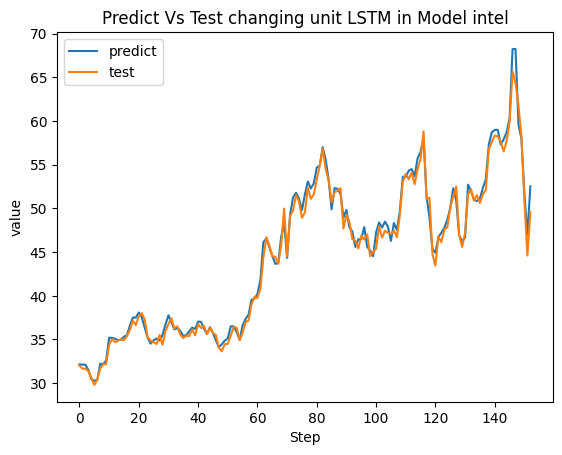

In [149]:
plt.plot(model1_int_preds_check, label='predict')
plt.plot(test_win_int_check,label='test')
plt.title("Predict Vs Test changing unit LSTM in Model intel")
plt.xlabel("Step")
plt.ylabel("value")
plt.legend()
plt.show()

Setelah mendapatkan hasil dari model pertama, loss yang didapatkan cukup baik.

Untuk melakukan uji coba selenajutnya akan mecoba algoritma dari GRU untuk melihat performa mana yang lebih baik.

Pada model kedua akan menggunakan GRU sebagai pengganti dari LSTM

In [150]:
model2_goo =  keras.Sequential()

In [151]:
# imput layer next with lstm
model2_goo.add(layers.GRU(units=50, input_shape=(5, 1), activation="relu"))
# output layer
model2_goo.add(layers.Dense(1,activation="linear"))

In [152]:
model2_goo.compile(loss="mse",optimizer=tf.optimizers.Adam())

In [153]:
model2_goo.fit(train_win_goo,
            train_lab_goo,
            epochs=50,
            verbose=1,
            batch_size=32,
            validation_data=(val_win_goo, val_lab_goo))

Epoch 1/50
15/15 [==============================] - 2s 24ms/step - loss: 0.0269 - val_loss: 0.1247
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0050 - val_loss: 0.0333
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0023 - val_loss: 0.0181
Epoch 4/50
15/15 [==============================] - 0s 5ms/step - loss: 6.6459e-04 - val_loss: 0.0054
Epoch 5/50
15/15 [==============================] - 0s 5ms/step - loss: 6.9551e-05 - val_loss: 0.0020
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 6.5356e-05 - val_loss: 0.0025
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 4.1987e-05 - val_loss: 0.0033
Epoch 8/50
15/15 [==============================] - 0s 5ms/step - loss: 4.2685e-05 - val_loss: 0.0028
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 4.3131e-05 - val_loss: 0.0027
Epoch 10/50
15/15 [==============================] - 0s 5ms/step - loss: 4.0675e-05 - val_los

In [154]:
model2_goo.evaluate(test_win_goo, test_lab_goo)

2/2 [==============================] - 0s 6ms/step - loss: 0.0065


0.006457001436501741

In [155]:
model2_goo_preds = model2_goo.predict(test_win_goo)
model2_goo_preds_check = scaler.inverse_transform(model2_goo_preds)

2/2 [==============================] - 0s 6ms/step


In [156]:
model2_goo_results = evaluate_preds(y_true=tf.squeeze(test_lab_goo), y_pred=model2_goo_preds.flatten())
google_model.loc[2] = ["GRU",model2_goo_results[0],model2_goo_results[1],model2_goo_results[2]]
print("MAE :",model2_goo_results[0])
print("RMSE :",model2_goo_results[1])
print("MAPE :",model2_goo_results[2])

MAE : 0.07354324
RMSE : 0.08035548
MAPE : 9.226133


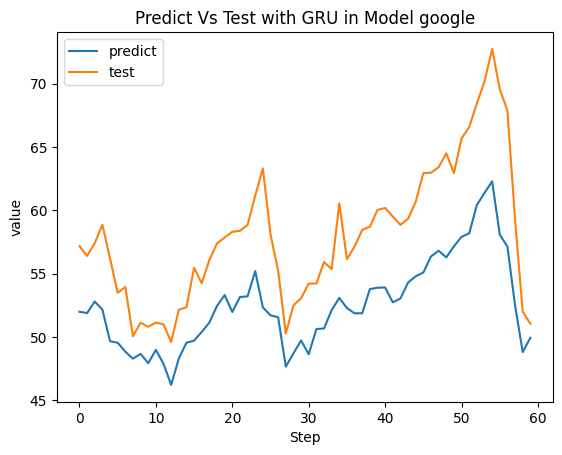

In [157]:
plt.plot(model2_goo_preds_check, label='predict')
plt.plot(test_win_goo_check,label='test')
plt.title("Predict Vs Test with GRU in Model google")
plt.xlabel("Step")
plt.ylabel("value")
plt.legend()
plt.show()

In [158]:
model2_int =  keras.Sequential()

In [159]:
# imput layer next with lstm
model2_int.add(layers.GRU(units=50, input_shape=(5, 1), activation="relu"))

# output layer
model2_int.add(layers.Dense(1,activation="linear"))

In [160]:
model2_int.compile(loss="mae",optimizer=tf.optimizers.Adam(learning_rate=0.001))

In [161]:
model2_int.fit(train_win_goo,
            train_lab_goo,
            epochs=50,
            verbose=1,
            batch_size=32,
            validation_data=(val_win_goo, val_lab_goo))

Epoch 1/50
15/15 [==============================] - 1s 22ms/step - loss: 0.1637 - val_loss: 0.5182
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 0.1010 - val_loss: 0.4012
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0696 - val_loss: 0.3102
Epoch 4/50
15/15 [==============================] - 0s 5ms/step - loss: 0.0587 - val_loss: 0.2607
Epoch 5/50
15/15 [==============================] - 0s 5ms/step - loss: 0.0443 - val_loss: 0.1787
Epoch 6/50
15/15 [==============================] - 0s 5ms/step - loss: 0.0170 - val_loss: 0.0252
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0516
Epoch 8/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0059 - val_loss: 0.0370
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0397
Epoch 10/50
15/15 [==============================] - 0s 5ms/step - loss: 0.0056 - val_loss: 0.0326
Epoch 11/50
15/15 

In [162]:
model2_int.evaluate(test_win_int, test_lab_int)

5/5 [==============================] - 0s 5ms/step - loss: 0.0272


0.027195706963539124

In [163]:
model2_int_preds = model2_goo.predict(test_win_int)
model2_int_preds_check = scaler.inverse_transform(model2_int_preds)

5/5 [==============================] - 0s 3ms/step


In [164]:
model2_int_results = evaluate_preds(y_true=tf.squeeze(test_lab_int), y_pred=model2_int_preds.flatten())
intel_model.loc[2] = ["GRU",model2_int_results[0],model2_int_results[1],model2_int_results[2]]
print("MAE :",model2_int_results[0])
print("RMSE :",model2_int_results[1])
print("MAPE :",model2_int_results[2])

MAE : 0.02885242
RMSE : 0.039915234
MAPE : 4.256309


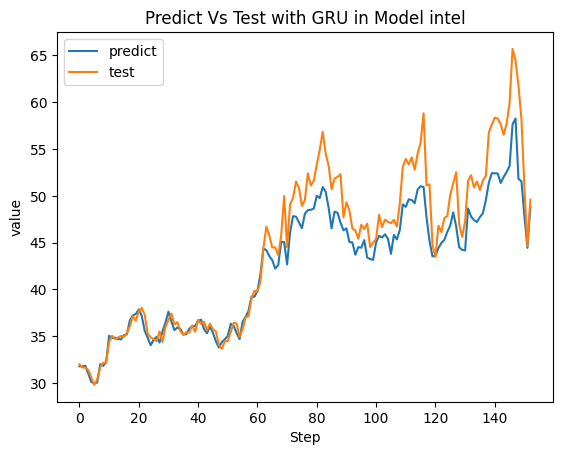

In [165]:
plt.plot(model2_int_preds_check, label='predict')
plt.plot(test_win_int_check,label='test')
plt.title("Predict Vs Test with GRU in Model intel")
plt.xlabel("Step")
plt.ylabel("value")
plt.legend()
plt.show()

Setelah melihat performa dari gru yang cukup kurang maka dari itu GRU tidak akan dilanjutkan.

Pada pemodelah selanjutnya akan menambahkan hidden layer di dalamm LSTM. Dimana secara teori menambahkan hidden layer akan meningkatkan akurasi model.

In [166]:
model3_goo =  keras.Sequential()

In [167]:
# imput layer next with lstm
model3_goo.add(layers.LSTM(units=75, input_shape=(5, 1), activation="relu"))
model3_goo.add(layers.Dense(60))
# output layer
model3_goo.add(layers.Dense(1,activation="linear"))

In [168]:
model3_goo.compile(loss="mse",optimizer=tf.optimizers.Adam())

In [169]:
model3_goo.fit(train_win_goo,
            train_lab_goo,
            epochs=50,
            verbose=1,
            batch_size=32,
            validation_data=(val_win_goo, val_lab_goo))

Epoch 1/50
15/15 [==============================] - 2s 25ms/step - loss: 0.0220 - val_loss: 0.0365
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0064 - val_loss: 0.0444
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 8.3394e-04
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 1.2744e-04 - val_loss: 6.2626e-04
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 6.3494e-05 - val_loss: 5.2276e-04
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 5.4546e-05 - val_loss: 2.8245e-04
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 5.2308e-05 - val_loss: 3.3025e-04
Epoch 8/50
15/15 [==============================] - 0s 10ms/step - loss: 5.2101e-05 - val_loss: 3.2280e-04
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 5.0842e-05 - val_loss: 3.0669e-04
Epoch 10/50
15/15 [==============================] - 0s 7ms/step

In [170]:
model3_goo.evaluate(test_win_goo, test_lab_goo)

2/2 [==============================] - 0s 9ms/step - loss: 5.1074e-04


0.0005107354372739792

In [171]:
model3_goo_preds = model3_goo.predict(test_win_goo)
model3_goo_preds_check = scaler.inverse_transform(model3_goo_preds)

2/2 [==============================] - 0s 4ms/step


In [172]:
model3_goo_results = evaluate_preds(y_true=tf.squeeze(test_lab_goo),y_pred=model3_goo_preds.flatten())
google_model.loc[3] = ["Dense 60",model3_goo_results[0],model3_goo_results[1],model3_goo_results[2]]
print("MAE :",model3_goo_results[0])
print("RMSE :",model3_goo_results[1])
print("MAPE :",model3_goo_results[2])

MAE : 0.017043483
RMSE : 0.02259945
MAPE : 2.2203598


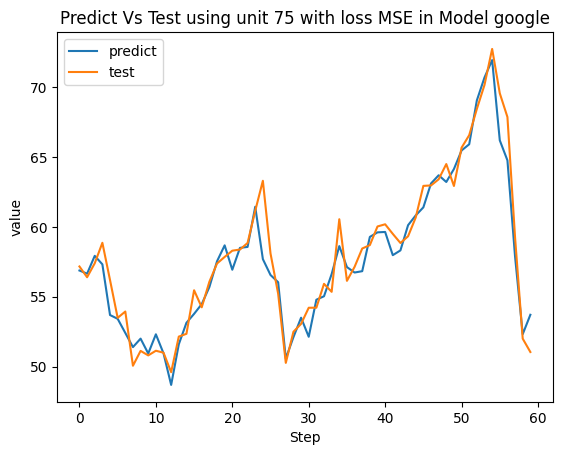

In [173]:
plt.plot(model3_goo_preds_check, label='predict')
plt.plot(test_win_goo_check,label='test')
plt.title("Predict Vs Test using unit 75 with loss MSE in Model google")
plt.xlabel("Step")
plt.ylabel("value")
plt.legend()
plt.show()

In [174]:
model3_int =  keras.Sequential()

In [175]:
# imput layer next with lstm
model3_int.add(layers.LSTM(units=75, input_shape=(5, 1), activation="relu"))
model3_int.add(layers.Dense(60))
# output layer
model3_int.add(layers.Dense(1,activation="linear"))

In [176]:
model3_int.compile(loss="mae",optimizer=tf.optimizers.Adam())

In [177]:
model3_int.fit(train_win_goo,
            train_lab_goo,
            epochs=50,
            verbose=1,
            batch_size=32,
            validation_data=(val_win_goo, val_lab_goo))

Epoch 1/50
15/15 [==============================] - 2s 41ms/step - loss: 0.1103 - val_loss: 0.1967
Epoch 2/50
15/15 [==============================] - 0s 12ms/step - loss: 0.0551 - val_loss: 0.1272
Epoch 3/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0171 - val_loss: 0.0308
Epoch 4/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0077 - val_loss: 0.0110
Epoch 5/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0058 - val_loss: 0.0116
Epoch 6/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0055 - val_loss: 0.0122
Epoch 7/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0061 - val_loss: 0.0149
Epoch 8/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0059 - val_loss: 0.0181
Epoch 9/50
15/15 [==============================] - 0s 12ms/step - loss: 0.0053 - val_loss: 0.0108
Epoch 10/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0060 - val_loss: 0.0111
Epoch 11/

In [178]:
model3_int.evaluate(test_win_int, test_lab_int)

5/5 [==============================] - 0s 4ms/step - loss: 0.0126


0.012599618174135685

In [179]:
model3_int_preds = model3_goo.predict(test_win_int)
model3_int_preds_check = scaler.inverse_transform(model3_int_preds)

5/5 [==============================] - 0s 3ms/step


In [180]:
model3_int_results = evaluate_preds(y_true=tf.squeeze(test_lab_int), y_pred=model3_int_preds.flatten())
intel_model.loc[3] = ["Dense 60",model3_int_results[0],model3_int_results[1],model3_int_results[2]]
print("MAE :",model3_int_results[0])
print("RMSE :",model3_int_results[1])
print("MAPE :",model3_int_results[2])

MAE : 0.012469493
RMSE : 0.0182536
MAPE : 2.0062723


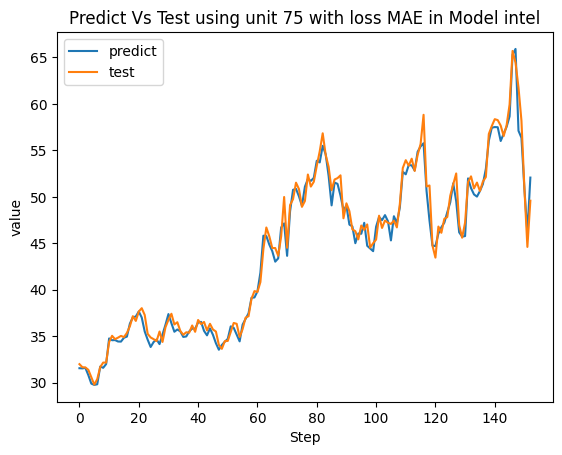

In [181]:
plt.plot(model3_int_preds_check, label='predict')
plt.plot(test_win_int_check,label='test')
plt.title("Predict Vs Test using unit 75 with loss MAE in Model intel")
plt.xlabel("Step")
plt.ylabel("value")
plt.legend()
plt.show()

###### [LO 3, LO 4, 5 poin] Lakukan evaluasi unjuk kerja kedua arsitektur di atas pada test set dengan mencari nilai RMSE, MAE dan MAPE. Dan berikan penjelasan mengenai hasilnya dengan rinci.

In [182]:
google_model

,Model,MAE,RMSE,MAPE
0,Base,0.058428,0.063507,7.371774
1,Unit 75 with MSE,0.017916,0.024287,2.341978
2,GRU,0.073543,0.080355,9.226133
3,Dense 60,0.017043,0.022599,2.220360


Penjelasan dari data diatas :
- Pada model base yang terbentuk oleh data google dapat dilihat dengan hanya base saja tidak ada optimizer dan menghasil hasil yang cukup baik, yaitu error 7.3 persen.

- Dari sini lah model dilakukan revisi kembali agar menghasilkan output yang lebih baik dengan mengati unit dari LSTM menjadi 75, selain itu menggati loss function mejadi MSE. Dengan mengganti loss dan unit error dari model menuru menjadi 2.3 persen.

- Pada model 3 akan mencoba merubah algoritma dari LSTM menjadi GRU, tetapi sayangnya cara ini tidak berhasil dimana error model naik menjadi 10 persen.

- Pada modified terkahir yang mana model terbaik. Pada  model ini di tambahkan dense yang mana menjadi hidden layer dengan 60 unit. Disini error dari model menurun hingga 2 persen. Jika dilihat dengan penambahan dense akan membuat model lebih mengenal data, sehingga error dari model menurun.

> 💡 Kesimpulan yang didapatkan base model yang sudah cukup baik tinggal penambahan fitur-fitur. fitur yang ditambahakan pada model adalah optimizer adam, menaikan unit LSTM dari 50 kek 75, dan penambahan hidden layer pada model dengan unit 60, dan mengganti loss function menjadi MSE. Dengan cara tersebut menurunkan error model hingga 1 persen dari base.

In [183]:
intel_model

,Model,MAE,RMSE,MAPE
0,Base,0.029388,0.037501,4.477377
1,Unit 75 with MAE,0.012818,0.021113,2.083454
2,GRU,0.028852,0.039915,4.256309
3,Dense 60,0.012469,0.018254,2.006272


Penjelasan dari data diatas :
- Pada awalnya saat menggunaknan RNN dengan metode LSTM didapatkan hasil untuk data intel cukup memuaskan pada bagian MAE, RMSE, MAPE. hal ini dapat dilihat dari error model 3 persen.

- Untuk mningkatkan model lebih dalam dengan menggunakan menaikan unit pada LSTM, tetapi disini loss function tidak diubah seperti data google. Pada kasus ini loss function dengan MAE menghasilkan hasil yang lebih baik daripada MSE. Hasil yang didapatkan hampir menurunkan error model 1 persen.

- Selanjutnya pada pengetesan ini sama seperti google menggunkan GRU, tetapi cara ini tidaklah berhasil, karena GRU tidak memberikan error yang lebih baik dari pada model diatasnya.

- Pada percobaan terakhir dimana merupakan best model pada tahapan ini sama seperti model google akan ditambahan hidden layer dengan 60. Dengan menabahkan hidden layer membuat model lebih mengenal data dan menurunkan error model.

> 💡 Kesimpulan yang didapatkan pada model ini adalah model dari data intel pada saat baseline sudah cukup baik. Sehingga pada saat modifikasi tidak terlalu membutuhkan banyak hal. Modifikasi yang digunakan menaikan unit dari LSTM, penggunaan optimizer, dan penggunaan hidden layer.